In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    import aup

/home/edgar/anaconda3/envs/geo_env/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.10.1-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.9.1-CAPI-1.14.2). Conversions between both will be slow.
  warnings.warn(


In [2]:
complementarias_gdf = gpd.read_file('/home/edgar/SIG/ObsCds/Proyectos/Museo_CienciasAmbientales/Medio_Urbano/Transporte_Publico/vwRutas_complementarias_y_otros_mapa_base_mayo_2021.shp',
                         driver='ESRIShapefile')
troncales_gdf = gpd.read_file('/home/edgar/SIG/ObsCds/Proyectos/Museo_CienciasAmbientales/Medio_Urbano/Transporte_Publico/vwCorredores_troncales_mapa_base_mayo_2021.shp',
                             driver='ESRIShapefile')

In [3]:
print(complementarias_gdf.shape)
complementarias_gdf.head(2)

(449, 4)


,Tipo_de_se,Clasificac,Clasifica0,geometry
0,Complementaria,Rutas complementarias y otros servicios,Operando,"LINESTRING (678662.391 2280955.399, 678671.428..."
1,Complementaria,Rutas complementarias y otros servicios,Operando,"LINESTRING (681285.232 2288258.855, 681281.106..."


In [4]:
print(troncales_gdf.shape)
troncales_gdf.head(2)

(221, 4)


,Tipo_de_se,Clasificac,Clasifica0,geometry
0,"T 05, López Mateos",Corredores troncales,Presentadas en grupo de Trabajo,"LINESTRING (661387.867 2270907.072, 661389.125..."
1,"T 05, López Mateos",Corredores troncales,Presentadas en grupo de Trabajo,"LINESTRING (666791.399 2284313.859, 666760.945..."


In [5]:
rutas_gdf = complementarias_gdf.append(troncales_gdf)
print(rutas_gdf.shape)
rutas_gdf.head(4)

(670, 4)


,Tipo_de_se,Clasificac,Clasifica0,geometry
0,Complementaria,Rutas complementarias y otros servicios,Operando,"LINESTRING (678662.391 2280955.399, 678671.428..."
1,Complementaria,Rutas complementarias y otros servicios,Operando,"LINESTRING (681285.232 2288258.855, 681281.106..."
2,Complementaria,Rutas complementarias y otros servicios,Operando,"LINESTRING (676906.172 2288931.420, 676861.592..."
3,Alimentadora Macrobús,Rutas complementarias y otros servicios,Operando,"LINESTRING (672707.921 2279751.215, 672721.691..."


<AxesSubplot:>

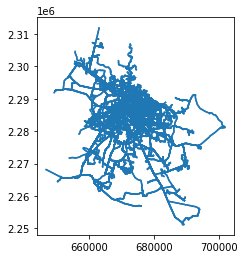

In [6]:
rutas_gdf.plot()

In [49]:
rutas_gdf.to_file('/home/edgar/SIG/ObsCds/Proyectos/Museo_CienciasAmbientales/Medio_Urbano/Transporte_Publico/Rutas_TP.geojson',
                             driver='GeoJSON')

## Análisis de transporte público

### Red de transporte público

In [11]:
rutas_gdf = gpd.read_file('/home/edgar/SIG/ObsCds/'+
                          'Proyectos/Museo_CienciasAmbientales'+
                          '/Medio_Urbano/Transporte_Publico/Transporte_Masivo/'+
                          'MacroPeriferico_Imeplan_UTM_v1.geojson',
                         driver='GeoJSON')
paradas_gdf = gpd.read_file('/home/edgar/SIG/ObsCds/'+
                          'Proyectos/Museo_CienciasAmbientales'+
                          '/Medio_Urbano/Transporte_Publico/Transporte_Masivo/'+
                            'Estaciones_MiMacro.geojson',
                         driver='GeoJSON')

In [12]:
print(rutas_gdf.shape)
rutas_gdf.head(2)

(93, 5)


,Tipo_de_co,Tipo,Nombre,Estado,geometry
0,Masivo,Circunvalar,Corredor 3 Circuito perif�rico (Mi Macro Perif...,En construcci�n,"LINESTRING (662096.413 2284192.153, 662096.413..."
1,Masivo,Circunvalar,Corredor 3 Circuito perif�rico (Mi Macro Perif...,En construcci�n,"LINESTRING (664462.242 2292315.052, 664462.242..."


In [13]:
print(paradas_gdf.shape)
paradas_gdf.head(2)

(46, 6)


,Nombre_de_,Sistema,Estructura,Estado,L�nea_y_si,geometry
0,Tepeyac,BRT (Bus Rapid Transit),Superficie,En proceso,Mi Macro Perif�rico,POINT (662096.413 2284192.153)
1,Trompo Magico,BRT (Bus Rapid Transit),Superficie,En proceso,Mi Macro Perif�rico,POINT (664462.242 2292315.052)


In [14]:
paradas_nx, rutas_nx = aup.create_network(paradas_gdf, rutas_gdf)

In [15]:
print(rutas_nx.shape)
rutas_nx.head(2)

(93, 9)


,Tipo_de_co,Tipo,Nombre,Estado,geometry,u,v,key,length
0,Masivo,Circunvalar,Corredor 3 Circuito perif�rico (Mi Macro Perif...,En construcci�n,"LINESTRING (-103.44406 20.65003, -103.44406 20...",2350147961102,2350147961102,0,0.0
1,Masivo,Circunvalar,Corredor 3 Circuito perif�rico (Mi Macro Perif...,En construcci�n,"LINESTRING (-103.42059 20.72319, -103.42059 20...",2352661969143,2352661969143,0,0.0


In [16]:
paradas_nx = paradas_nx.iloc[paradas_nx.osmid.drop_duplicates().index]
print(paradas_nx.shape)
paradas_nx.head(2)

(46, 7)


,Nombre_de_,Sistema,Estructura,Estado,L�nea_y_si,geometry,osmid
0,Tepeyac,BRT (Bus Rapid Transit),Superficie,En proceso,Mi Macro Perif�rico,POINT (-103.44406 20.65003),2350147961102
1,Trompo Magico,BRT (Bus Rapid Transit),Superficie,En proceso,Mi Macro Perif�rico,POINT (-103.42059 20.72319),2352661969143


## Red OSMnx

### Abre red local

In [5]:
import osmnx as ox

In [6]:
edges = gpd.read_file('/home/edgar/SIG/ObsCds/Proyectos/Museo_CienciasAmbientales/Medio_Urbano/Vias_Transporte/edges_speed_AMG.geojson', driver='GeoJSON')
print(edges.shape)
edges.head(2)

(414774, 16)


,id,u,v,key,osmid,oneway,length,grade,grade_abs,bridge,junction,service,tunnel,walkspeed,time_min,geometry
0,-1.922695e+09,1.680913e+09,1.680913e+09,0.0,155732288,False,45.603,0.022,0.022,None,None,None,None,3.703559,0.738797,"LINESTRING (-103.25834 20.68905, -103.25844 20..."
1,-1.922105e+09,4.343498e+09,4.343498e+09,0.0,436461417,False,141.661,0.042,0.042,None,None,None,None,3.453176,2.461404,"LINESTRING (-103.19724 20.66496, -103.19742 20..."


In [7]:
nodes = gpd.read_file('/home/edgar/SIG/ObsCds/Proyectos/Museo_CienciasAmbientales/Medio_Urbano/Vias_Transporte/nodes_AMG.geojson', driver='GeoJSON')
print(nodes.shape)
nodes.head(2)

(172090, 5)


,osmid,x,y,street_count,geometry
0,28751344,-103.306309,20.711533,3.0,POINT (-103.30631 20.71153)
1,28753224,-103.316645,20.700650,3.0,POINT (-103.31665 20.70065)


In [8]:
G = ox.graph_from_gdfs(nodes.set_index('osmid'), edges.set_index(['u','v','key']))

### Crea red con transporte público

In [12]:
paradas_fn = paradas_nx.rename(columns={'osmid':'coord_id'})
print(paradas_fn.shape)
paradas_fn.head(2)

(36440, 13)


,fid,cat,Tipo_de_se,Clasificac,Clasifica0,vertex_pos,vertex_ind,vertex_par,vertex_p_1,distance,angle,geometry,coord_id
0,1,1,Complementaria,Rutas complementarias y otros servicios,Operando,0,0,0,0,0.000000,71.784975,POINT (-103.28542 20.61928),2366578957556
1,1,1,Complementaria,Rutas complementarias y otros servicios,Operando,-1,5,0,5,391.464694,9.373501,POINT (-103.28464 20.62267),2366663957929


In [13]:
paradas_osmid = aup.find_nearest(G, nodes.set_index('osmid'), paradas_fn, return_distance= True)

In [14]:
print(paradas_osmid.shape)
paradas_osmid.head(4)

(36440, 15)


,fid,cat,Tipo_de_se,Clasificac,Clasifica0,vertex_pos,vertex_ind,vertex_par,vertex_p_1,distance,angle,geometry,coord_id,osmid,distance_node
0,1,1,Complementaria,Rutas complementarias y otros servicios,Operando,0,0,0,0,0.000000,71.784975,POINT (-103.28542 20.61928),2366578957556,7911972970,69.639706
1,1,1,Complementaria,Rutas complementarias y otros servicios,Operando,-1,5,0,5,391.464694,9.373501,POINT (-103.28464 20.62267),2366663957929,1448560100,4.743718
2,2,1,Complementaria,Rutas complementarias y otros servicios,Operando,-1,10,0,10,391.464694,37.884785,POINT (-103.28750 20.62420),2366367958101,1448560168,12.158505
3,3,1,Complementaria,Rutas complementarias y otros servicios,Operando,-1,14,0,14,391.464694,36.925720,POINT (-103.28615 20.62746),2366510958458,1626459520,13.938591


media: 30.88


<AxesSubplot:>

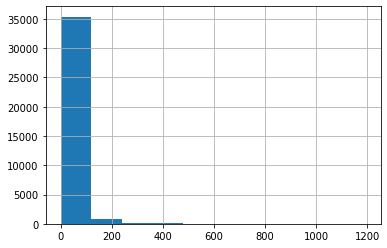

In [15]:
print('media:',round(paradas_osmid.distance_node.mean(),2))
paradas_osmid.distance_node.hist()

### Sobreescribir ids de con osmids en paradas

In [16]:
rutas_osmid = rutas_nx.merge(paradas_osmid[['coord_id','osmid']], left_on='u', right_on='coord_id')
rutas_osmid = rutas_osmid.merge(paradas_osmid[['coord_id','osmid']], left_on='v', right_on='coord_id')
rutas_osmid.head(2)

,fid,cat,Tipo_de_se,Clasificac,Clasifica0,geometry,u,v,key,length,coord_id_x,osmid_x,coord_id_y,osmid_y
0,1,1,Complementaria,Rutas complementarias y otros servicios,Operando,"LINESTRING (-103.28542 20.61928, -103.28533 20...",2366578957556,2366663957929,0,389.835333,2366578957556,7911972970,2366663957929,1448560100
1,13780,250,Complementaria,Rutas complementarias y otros servicios,Operando,"LINESTRING (-103.28542 20.61928, -103.28533 20...",2366578957556,2366662957927,0,387.507594,2366578957556,7911972970,2366662957927,1448560100


In [17]:
rutas_osmid=rutas_osmid.drop(columns=['u','v','coord_id_x','coord_id_y']).rename(columns={'osmid_x':'u','osmid_y':'v'})

In [138]:
rutas_osmid = rutas_osmid.to_crs("EPSG:32613")

In [18]:
rutas_osmid['walkspeed'] = 30
rutas_osmid['time_min'] = rutas_osmid['length']/(1000*rutas_osmid['walkspeed']/60)

In [19]:
rutas_osmid.head()

,fid,cat,Tipo_de_se,Clasificac,Clasifica0,geometry,key,length,u,v,walkspeed,time_min
0,1,1,Complementaria,Rutas complementarias y otros servicios,Operando,"LINESTRING (-103.28542 20.61928, -103.28533 20...",0,389.835333,7911972970,1448560100,30,0.779671
1,13780,250,Complementaria,Rutas complementarias y otros servicios,Operando,"LINESTRING (-103.28542 20.61928, -103.28533 20...",0,387.507594,7911972970,1448560100,30,0.775015
2,2,1,Complementaria,Rutas complementarias y otros servicios,Operando,"LINESTRING (-103.28464 20.62267, -103.28462 20...",0,389.834610,1448560100,1448560168,30,0.779669
3,3,1,Complementaria,Rutas complementarias y otros servicios,Operando,"LINESTRING (-103.28750 20.62420, -103.28740 20...",0,389.834005,1448560168,1626459520,30,0.779668
4,4,1,Complementaria,Rutas complementarias y otros servicios,Operando,"LINESTRING (-103.28615 20.62746, -103.28606 20...",0,389.832682,1626459520,8771129800,30,0.779665


In [114]:
paradas_fn.merge(paradas_osmid[['coord_id','osmid']], on='coord_id')

,fid,cat,Tipo_de_se,Clasificac,Clasifica0,vertex_pos,vertex_ind,vertex_par,vertex_p_1,distance,angle,geometry,coord_id,osmid_x,distance_node,osmid_y
0,1,1,Complementaria,Rutas complementarias y otros servicios,Operando,0,0,0,0,0.000000,71.784975,POINT (-103.28542 20.61928),2366578957556,7911972970,69.639706,7911972970
1,1,1,Complementaria,Rutas complementarias y otros servicios,Operando,-1,5,0,5,391.464694,9.373501,POINT (-103.28464 20.62267),2366663957929,1448560100,4.743718,1448560100
2,2,1,Complementaria,Rutas complementarias y otros servicios,Operando,-1,10,0,10,391.464694,37.884785,POINT (-103.28750 20.62420),2366367958101,1448560168,12.158505,1448560168
3,3,1,Complementaria,Rutas complementarias y otros servicios,Operando,-1,14,0,14,391.464694,36.925720,POINT (-103.28615 20.62746),2366510958458,1626459520,13.938591,1626459520
4,4,1,Complementaria,Rutas complementarias y otros servicios,Operando,-1,13,0,13,391.464694,8.868869,POINT (-103.28547 20.63079),2366584958825,8771129800,10.459439,8771129800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36435,37579,670,"T 16, Juan Gil Preciado",Corredores troncales,Operando,-1,4,0,4,394.912360,143.860428,POINT (-103.44275 20.81898),2350469979726,2689210151,5.676870,2689210151
36436,37580,670,"T 16, Juan Gil Preciado",Corredores troncales,Operando,-1,11,0,11,394.912360,6.650223,POINT (-103.44024 20.82042),2350732979882,8393360156,30.282027,8393360156
36437,37581,670,"T 16, Juan Gil Preciado",Corredores troncales,Operando,-1,14,0,14,394.912360,80.066762,POINT (-103.43914 20.82294),2350848980158,6131379217,15.787354,6131379217
36438,37582,670,"T 16, Juan Gil Preciado",Corredores troncales,Operando,-1,11,0,11,394.912360,88.147322,POINT (-103.43543 20.82342),2351233980207,8840219602,35.585750,8840219602


### Unión de rutas con vialidades

In [20]:
rutas_osmid = rutas_osmid.to_crs("EPSG:4326")

In [21]:
rutas_edges = edges.append(rutas_osmid)

In [22]:
rutas_edges.head(2)

,id,u,v,key,osmid,oneway,length,grade,grade_abs,bridge,...,service,tunnel,walkspeed,time_min,geometry,fid,cat,Tipo_de_se,Clasificac,Clasifica0
0,-1.922695e+09,1.680913e+09,1.680913e+09,0.0,155732288,False,45.603,0.022,0.022,None,...,None,None,3.703559,0.738797,"LINESTRING (-103.25834 20.68905, -103.25844 20...",NaN,NaN,NaN,NaN,NaN
1,-1.922105e+09,4.343498e+09,4.343498e+09,0.0,436461417,False,141.661,0.042,0.042,None,...,None,None,3.453176,2.461404,"LINESTRING (-103.19724 20.66496, -103.19742 20...",NaN,NaN,NaN,NaN,NaN


### Distance analysis

In [23]:
museo = nodes.loc[nodes.osmid==999999].copy()

In [24]:
nodes_analysis = nodes.set_index('osmid')
edges_analysis = rutas_edges.set_index(['u','v','key'])

In [25]:
nodes.isna().sum()

osmid           0
x               0
y               0
street_count    6
geometry        0
dtype: int64

In [36]:
rutas_edges[~rutas_edges.u.isna()]

,id,u,v,key,osmid,oneway,length,grade,grade_abs,bridge,...,service,tunnel,walkspeed,time_min,geometry,fid,cat,Tipo_de_se,Clasificac,Clasifica0
0,-1.922695e+09,1.680913e+09,1.680913e+09,0.0,155732288,False,45.603000,0.022,0.022,None,...,None,None,3.703559,0.738797,"LINESTRING (-103.25834 20.68905, -103.25844 20...",NaN,NaN,NaN,NaN,NaN
1,-1.922105e+09,4.343498e+09,4.343498e+09,0.0,436461417,False,141.661000,0.042,0.042,None,...,None,None,3.453176,2.461404,"LINESTRING (-103.19724 20.66496, -103.19742 20...",NaN,NaN,NaN,NaN,NaN
2,-1.921712e+09,4.649992e+09,4.649992e+09,0.0,470809481,False,51.937000,0.000,0.000,None,...,None,None,4.000000,0.779055,"LINESTRING (-103.44378 20.45094, -103.44426 20...",NaN,NaN,NaN,NaN,NaN
3,-1.920991e+09,4.649992e+09,4.649992e+09,0.0,470809480,False,13.993000,0.000,0.000,None,...,None,None,4.000000,0.209895,"LINESTRING (-103.44356 20.45154, -103.44369 20...",NaN,NaN,NaN,NaN,NaN
4,-1.920729e+09,4.649992e+09,4.649992e+09,0.0,470809480,False,178.729000,-0.056,0.056,None,...,None,None,3.288049,3.261430,"LINESTRING (-103.44455 20.44932, -103.44566 20...",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37578,NaN,2.690649e+09,2.689210e+09,0.0,NaN,NaN,393.230480,NaN,NaN,NaN,...,NaN,NaN,30.000000,0.786461,"LINESTRING (-103.44636 20.81887, -103.44287 20...",37579.0,670.0,"T 16, Juan Gil Preciado",Corredores troncales,Operando
37579,NaN,2.689210e+09,8.393360e+09,0.0,NaN,NaN,393.229850,NaN,NaN,NaN,...,NaN,NaN,30.000000,0.786460,"LINESTRING (-103.44275 20.81898, -103.44269 20...",37580.0,670.0,"T 16, Juan Gil Preciado",Corredores troncales,Operando
37580,NaN,8.393360e+09,6.131379e+09,0.0,NaN,NaN,393.228860,NaN,NaN,NaN,...,NaN,NaN,30.000000,0.786458,"LINESTRING (-103.44024 20.82042, -103.44021 20...",37581.0,670.0,"T 16, Juan Gil Preciado",Corredores troncales,Operando
37581,NaN,6.131379e+09,8.840220e+09,0.0,NaN,NaN,393.227987,NaN,NaN,NaN,...,NaN,NaN,30.000000,0.786456,"LINESTRING (-103.43914 20.82294, -103.43883 20...",37582.0,670.0,"T 16, Juan Gil Preciado",Corredores troncales,Operando


In [37]:
nodes_dist = aup.calculate_distance_nearest_poi(museo, nodes, 
                rutas_edges[~rutas_edges.u.isna()], 'museo', 'osmid', wght='time_min')

In [38]:
nodes_dist.rename(columns={'dist_museo':'time_museo'}, inplace=True)

In [39]:
nodes_dist.to_file('/home/edgar/SIG/ObsCds/Proyectos/Museo_CienciasAmbientales/Medio_Urbano/Analisis/nodes_time_AMG_TP.geojson', driver='GeoJSON')